# Import 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
import xlrd

RandomForestRegressor()


# Data


In [41]:
satelit_data=(r'..\data\AgERA5_4params_graz.csv')
local_data=(r'..\data\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')
traffic_data=(r'..\data\traffic_KP.xlsx')

In [42]:
df_satelit= pd.read_csv(satelit_data,index_col = 0)
df_local = pd.read_csv(local_data,index_col = 0)

In [43]:
df_local.index = pd.to_datetime(df_local.index)
df_local.columns
df_local.Ost_Winddirection

2010-01-01          NaN
2010-01-02          NaN
2010-01-03          NaN
2010-01-04          NaN
2010-01-05          NaN
                ...    
2021-07-03    182.59240
2021-07-04    130.74823
2021-07-05    139.74475
2021-07-06    129.45146
2021-07-07    130.95103
Name: Ost_Winddirection, Length: 4206, dtype: float64

In [44]:
df_satelit.index = pd.to_datetime(df_satelit.index)


In [45]:
df_ulice = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='Sheet1', index_col=0)
df_ulice_podaci = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='traffic_data_containsNA_KP', index_col=0)

In [46]:
df_ulice_podaci.index = pd.to_datetime(df_ulice_podaci.index)

In [47]:
df_local=df_local['2018-01-01':'2020-03-15']
df_ulice_podaci=df_ulice_podaci['2018-01-01':'2020-03-15']
df_satelit=df_satelit['2018-01-01':'2020-03-15']

In [48]:
df_ulice_podaci

,8010_208,8020_110,8020_119,8020_122,8053_111,8010_205,8010_209,8010_213,8010_214,8020_102,8020_103,8020_107,8041_218,8041_221,8045_203,8051_101
2018-01-01,663.0,534.0,624.0,668.0,467.0,352.0,344.0,364.0,341.0,622.0,816.0,384.0,175.0,459.0,376.0,543.0
2018-01-02,927.0,924.0,772.0,1191.0,904.0,673.0,563.0,544.0,702.0,1181.0,1390.0,889.0,451.0,1070.0,755.0,1128.0
2018-01-03,962.0,922.0,772.0,1206.0,883.0,699.0,587.0,553.0,711.0,1149.0,1358.0,885.0,453.0,1104.0,767.0,1099.0
2018-01-04,978.0,941.0,801.0,1233.0,900.0,720.0,606.0,565.0,726.0,1176.0,1404.0,904.0,458.0,1126.0,776.0,1131.0
2018-01-05,1027.0,986.0,852.0,1278.0,946.0,743.0,613.0,604.0,762.0,1278.0,1468.0,956.0,475.0,1175.0,838.0,1238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,931.0,1193.0,469.0,1342.0,1019.0,683.0,698.0,680.0,812.0,1396.0,1542.0,1011.0,510.0,1351.0,NaN,1357.0
2020-03-12,922.0,1158.0,478.0,1333.0,992.0,652.0,664.0,669.0,792.0,1366.0,1509.0,1022.0,507.0,1303.0,NaN,1337.0
2020-03-13,892.0,1166.0,492.0,1371.0,989.0,655.0,639.0,689.0,817.0,1424.0,1513.0,992.0,523.0,1266.0,NaN,1335.0
2020-03-14,487.0,727.0,341.0,877.0,613.0,320.0,359.0,382.0,447.0,872.0,1001.0,597.0,310.0,560.0,NaN,778.0


# Nan vrijednosti

In [49]:
print(df_local.isnull().sum()) 
print(df_satelit.isnull().sum())

print(df_ulice_podaci.isnull().sum())

# popunjavnaje nan vrijednosti s mean za svaku kolonu

df_ulice_podaci = df_ulice_podaci.fillna(df_ulice_podaci.mean())


8010_208      2
8020_110      2
8020_119      3
8020_122      2
8053_111      2
8010_205      2
8010_209      2
8010_213      2
8010_214      2
8020_102      5
8020_103      2
8020_107     45
8041_218      2
8041_221      2
8045_203    155
8051_101      2
dtype: int64


# Merge

In [50]:
Postaje=df_ulice.Reference_station
Udaljenost = df_ulice['Distance to ref']

In [51]:
Postaje.index


Index(['8010_205', '8010_208', '8010_209', '8010_213', '8010_214', '8020_102',
       '8020_103', '8020_107', '8020_110', '8020_119', '8020_122', '8041_218',
       '8041_221', '8045_203', '8051_101', '8053_111', 'Nord', 'Ost', 'West',
       'DonBosco', 'Sud'],
      dtype='object', name='Code')

In [52]:

Postaje=df_ulice.Reference_station
for value,index,udaljenost in zip(Postaje,Postaje.index,Udaljenost):
    if value == 'DonBosco':
        print(value,index,udaljenost)
        

DonBosco 8020_110 381.0013899
DonBosco 8020_119 1682.330202
DonBosco 8020_122 1169.35142
DonBosco 8053_111 1363.162404


# Model za najblizu ulicu DonBoscu

#### Najbliza ulica

In [53]:
df_ulica=df_ulice_podaci['8020_110']

#### Satelitski podaci i ulica

In [72]:
data_1 = pd.concat([df_ulica, df_satelit],axis = 1, join='inner')

In [73]:
data_1

,8020_110,Cloud_Cover_Mean,Temperature_Air_2m_Max_Day_Time,Temperature_Air_2m_Min_Night_Time,Wind_Speed_10m_Mean
2018-01-01,534.0,0.893296,278.74033,270.52847,1.623206
2018-01-02,924.0,0.503345,279.71332,269.62915,1.543163
2018-01-03,922.0,0.743314,278.92648,269.39212,1.714147
2018-01-04,941.0,0.725115,278.94653,268.99817,1.569204
2018-01-05,986.0,0.628760,282.68980,271.70870,1.529516
...,...,...,...,...,...
2020-03-11,1193.0,0.398178,292.04724,276.82938,1.686576
2020-03-12,1158.0,0.577425,292.19217,275.74820,1.398011
2020-03-13,1166.0,0.773257,283.48755,277.98690,1.092477
2020-03-14,727.0,0.847917,282.70963,273.14575,1.578722


#### Izdvajanje vrijednosti za Nord iz lokalnih podataka

In [55]:
df = df_local.filter(regex='DonBosco')

#### Spajanje u df 

In [56]:
data_2 =  pd.concat([data_1, df],axis = 1, join='inner')

#### Temporals

In [57]:
temporals = ['year', 'dayofyear', 'month_Apr',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jul',
       'month_Jun', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'season_fall', 'season_spring', 'season_summer',
       'season_winter','holiday', 'holiday_school' ]
data_temporals = df_local[temporals]

In [58]:
data =  pd.concat([data_2, data_temporals],axis = 1, join='inner')

,8020_110,Cloud_Cover_Mean,Temperature_Air_2m_Max_Day_Time,Temperature_Air_2m_Min_Night_Time,Wind_Speed_10m_Mean,DonBosco_RH,DonBosco_Temp,year,dayofyear,month_Apr,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_fall,season_spring,season_summer,season_winter,holiday,holiday_school
2018-01-01,534.0,0.893296,278.74033,270.52847,1.623206,84.527770,2.261216,2018,1,0,...,0,0,0,0,0,0,0,1,1,1
2018-01-02,924.0,0.503345,279.71332,269.62915,1.543163,88.605225,2.986695,2018,2,0,...,0,0,1,0,0,0,0,1,0,1
2018-01-03,922.0,0.743314,278.92648,269.39212,1.714147,94.942635,0.992506,2018,3,0,...,0,0,0,1,0,0,0,1,0,1
2018-01-04,941.0,0.725115,278.94653,268.99817,1.569204,86.232506,0.789811,2018,4,0,...,0,1,0,0,0,0,0,1,0,1
2018-01-05,986.0,0.628760,282.68980,271.70870,1.529516,87.939660,0.811022,2018,5,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,1193.0,0.398178,292.04724,276.82938,1.686576,55.493607,8.210900,2020,71,0,...,0,0,0,1,0,1,0,0,0,0
2020-03-12,1158.0,0.577425,292.19217,275.74820,1.398011,57.125520,12.189883,2020,72,0,...,0,1,0,0,0,1,0,0,0,0
2020-03-13,1166.0,0.773257,283.48755,277.98690,1.092477,64.571340,12.133071,2020,73,0,...,0,0,0,0,0,1,0,0,0,0
2020-03-14,727.0,0.847917,282.70963,273.14575,1.578722,91.676670,7.734913,2020,74,0,...,0,0,0,0,0,1,0,0,0,0


# Model za DonBosco s najblizim traficom (8020_110|DONBOSCO|KärntnerStraßeQ2|Gesamt)

DonBosco
R-squared scores: -0.06


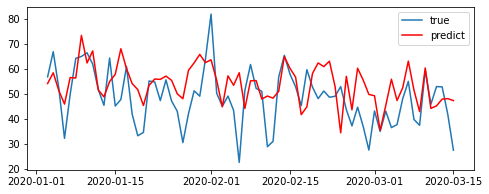

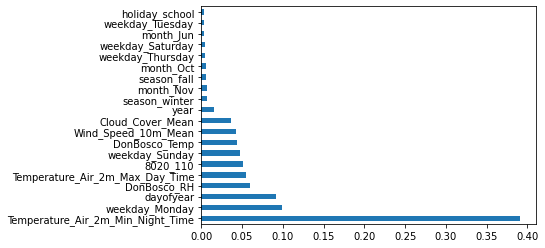

In [60]:
Y = df_local['D_NO2']
X = data
X_train = X['2018-01-01':'2019-12-31']
X_test = X['2020-01-03':'2020-03-15']
Y_train = Y['2018-01-01':'2019-12-31']
Y_test = Y['2020-01-03':'2020-03-15']
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('DonBosco')
print('R-squared scores:', round(r2, 2))        
Y_pred = pd.Series(predictions, index= Y_test.index)
plt.figure(figsize=(8, 3))
plt.plot(Y_test)
plt.plot(Y_pred, 'r')
plt.legend(['true', 'predict'])
plt.show()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model bez traffic podataka 

In [61]:
data_3 =  pd.concat([df_satelit, df],axis = 1, join='inner')

In [62]:
data_4 =  pd.concat([data_3, data_temporals],axis = 1, join='inner')

DonBosco
R-squared scores: -0.03


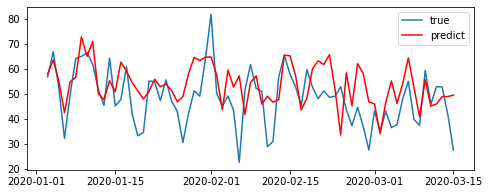

In [63]:
Y = df_local['D_NO2']
X = data_4
X_train = X['2018-01-01':'2019-12-31']
X_test = X['2020-01-03':'2020-03-15']
Y_train = Y['2018-01-01':'2019-12-31']
Y_test = Y['2020-01-03':'2020-03-15']
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('DonBosco')
print('R-squared scores:', round(r2, 2))        
Y_pred = pd.Series(predictions, index= Y_test.index)
plt.figure(figsize=(8, 3))
plt.plot(Y_test)
plt.plot(Y_pred, 'r')
plt.legend(['true', 'predict'])
plt.show()

# Model sa svim prometom oko DonBosca

DonBosco 8020_110 381.0013899

DonBosco 8020_119 1682.330202

DonBosco 8020_122 1169.35142

DonBosco 8053_111 1363.162404

In [64]:
df_ulice_podaci.columns

Index(['8010_208', '8020_110', '8020_119', '8020_122', '8053_111', '8010_205',
       '8010_209', '8010_213', '8010_214', '8020_102', '8020_103', '8020_107',
       '8041_218', '8041_221', '8045_203', '8051_101'],
      dtype='object')

Podaci za ulice

In [66]:
df_ulica_sve_D=df_ulice_podaci[['8020_110','8020_119','8020_122', '8053_111']]

Podaci ulica i satelita

In [67]:
data_5 = pd.concat([df_ulica_sve_D, df_satelit],axis = 1, join='inner')

Lokalni podaci za vrijeme

In [68]:
data_6 =  pd.concat([data_5, df],axis = 1, join='inner')

In [69]:
data_7 =  pd.concat([data_6, data_temporals],axis = 1, join='inner')

In [70]:
data_7

,8020_110,8020_119,8020_122,8053_111,Cloud_Cover_Mean,Temperature_Air_2m_Max_Day_Time,Temperature_Air_2m_Min_Night_Time,Wind_Speed_10m_Mean,DonBosco_RH,DonBosco_Temp,...,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,season_fall,season_spring,season_summer,season_winter,holiday,holiday_school
2018-01-01,534.0,624.0,668.0,467.0,0.893296,278.74033,270.52847,1.623206,84.527770,2.261216,...,0,0,0,0,0,0,0,1,1,1
2018-01-02,924.0,772.0,1191.0,904.0,0.503345,279.71332,269.62915,1.543163,88.605225,2.986695,...,0,0,1,0,0,0,0,1,0,1
2018-01-03,922.0,772.0,1206.0,883.0,0.743314,278.92648,269.39212,1.714147,94.942635,0.992506,...,0,0,0,1,0,0,0,1,0,1
2018-01-04,941.0,801.0,1233.0,900.0,0.725115,278.94653,268.99817,1.569204,86.232506,0.789811,...,0,1,0,0,0,0,0,1,0,1
2018-01-05,986.0,852.0,1278.0,946.0,0.628760,282.68980,271.70870,1.529516,87.939660,0.811022,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11,1193.0,469.0,1342.0,1019.0,0.398178,292.04724,276.82938,1.686576,55.493607,8.210900,...,0,0,0,1,0,1,0,0,0,0
2020-03-12,1158.0,478.0,1333.0,992.0,0.577425,292.19217,275.74820,1.398011,57.125520,12.189883,...,0,1,0,0,0,1,0,0,0,0
2020-03-13,1166.0,492.0,1371.0,989.0,0.773257,283.48755,277.98690,1.092477,64.571340,12.133071,...,0,0,0,0,0,1,0,0,0,0
2020-03-14,727.0,341.0,877.0,613.0,0.847917,282.70963,273.14575,1.578722,91.676670,7.734913,...,0,0,0,0,0,1,0,0,0,0


DonBosco
R-squared scores: -0.0


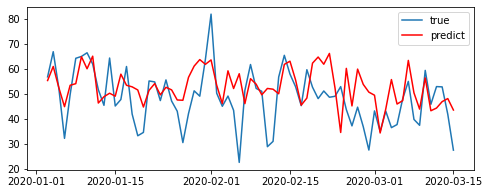

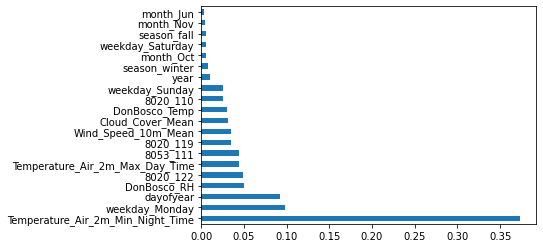

In [71]:
Y = df_local['D_NO2']
X = data_7
X_train = X['2018-01-01':'2019-12-31']
X_test = X['2020-01-03':'2020-03-15']
Y_train = Y['2018-01-01':'2019-12-31']
Y_test = Y['2020-01-03':'2020-03-15']
model = RandomForestRegressor(n_estimators = 100)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
r2 = r2_score(Y_test, predictions)
print('DonBosco')
print('R-squared scores:', round(r2, 2))        
Y_pred = pd.Series(predictions, index= Y_test.index)
plt.figure(figsize=(8, 3))
plt.plot(Y_test)
plt.plot(Y_pred, 'r')
plt.legend(['true', 'predict'])
plt.show()
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()